# Ai4 Good - Male Breast Cancer Challenge 

## Downloading our Dataset from Kaggle

This is just to show you how to use the Kaggle API if you are already a bit of an advanced coder as Kaggle is a great repository for datasets. Otherwise, you can just download the dataset from here: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data or, even easier, use the toy dataset provided by sklearn as I show you below.

In [ ]:
!pip install kaggle --upgrade

In [ ]:

!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json

api_token = {"username":"gloriamacia","key":"38fa63be708bce9c3ab0900a6cc8b486"}

import json
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)


In [ ]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 19.4MB/s]


In [ ]:
!pwd

/content


In [ ]:
!ls

breast-cancer-wisconsin-data.zip  sample_data


In [ ]:
import os
import zipfile
for file in os.listdir():
  if file.endswith('.zip'):
    with zipfile.ZipFile(file, 'r') as zip_ref:
      zip_ref.extractall()

In [ ]:
os.listdir()

['.config', 'breast-cancer-wisconsin-data.zip', 'data.csv', 'sample_data']

Let's move our newly downloaded to our gdrive to make sure our work gets saved in permanent storage.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!mv data.csv "/gdrive/My Drive/Ai4Good - Male Breast Cancer/"

In [ ]:
import os
os.chdir("/gdrive/My Drive/Ai4Good - Male Breast Cancer/")

In [ ]:
!ls

'Ai4Good - Breast Cancer.ipynb'			 data.csv   output.html
'Ai4Good - Male Breast Cancer Challenge.gform'	 EDA.html


## Getting our data with a single code line

The dataset we will be using in this notebook happens to be one of the toy datasets of sklearn and you can get it from [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) with a single code line. 

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
dataset = load_breast_cancer()
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

## Data Science Project Management

Let's briefly talk about the phases of any data science project using a popular project management framework called [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining).

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
import os
os.chdir("/gdrive/My Drive/Ai4Good - Male Breast Cancer/")

![picture](https://drive.google.com/uc?export=view&id=14RS9oJhjs32umkX9uUTXanHDjqz6z1In)


## Business Understanding

In [5]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [5]:
dataset = load_breast_cancer()
print(dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## Data Understanding

Letś do some exploratory data analysis (EDA) with some of the coolest python libraries!

In [6]:
import pandas as pd
X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
X.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [8]:
y = pd.Series(dataset['target'])
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int64

#### Matplotlib and Seaborn

In [9]:
X.shape

(569, 30)

In [10]:
y.shape

(569,)

In [11]:
import numpy as np
X.describe(include=np.number)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [13]:
y.describe(include=np.number)

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

In [14]:
y.value_counts(normalize=True) # observe that in this case is the same as the mean

1    0.627417
0    0.372583
dtype: float64

Very popular data visualization libraries are matplotlib and [seaborn](https://seaborn.pydata.org/).

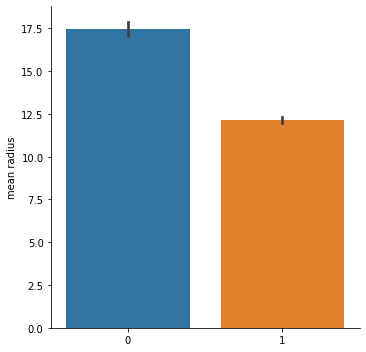

In [15]:
import seaborn as sns
g = sns.catplot(
    data=X, kind="bar",
    x=y, y="mean radius", 
)

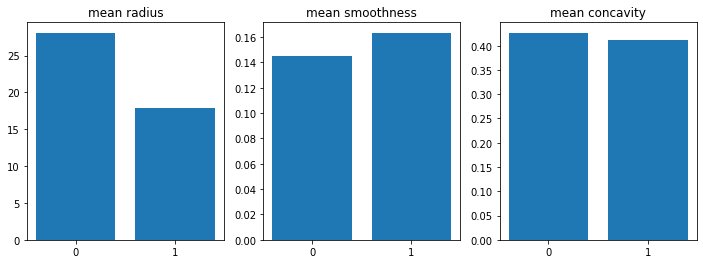

In [16]:
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
n = 3
fig, axs = plt.subplots(1, n, figsize=(12, 4), sharey=False)
labels = ['mean radius', 'mean smoothness', 'mean concavity']
for i in range(0,3):
  axs[i].bar(y, X[labels[i]])
  axs[i].title.set_text(labels[i])
  axs[i].xaxis.set_major_locator(MaxNLocator(integer=True))

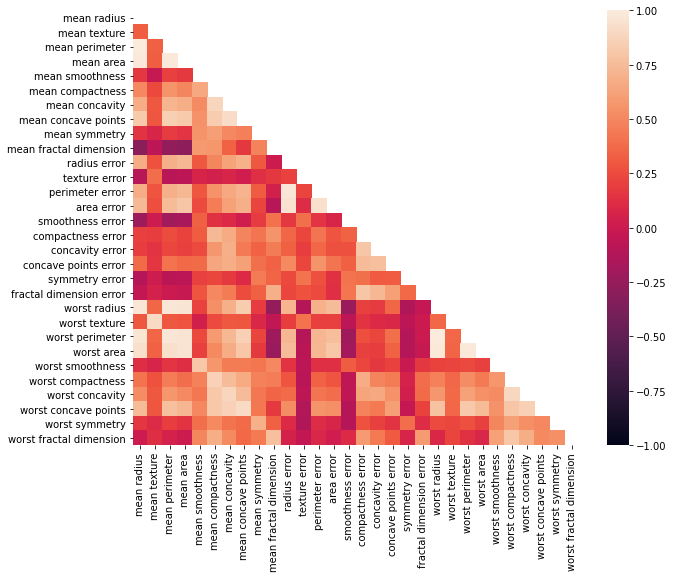

In [17]:
import numpy as np
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr, vmin=-1, vmax=1, mask=mask)

As can be seen from the plot above, radius_mean is highly correlated with perimeter_mean and area_mean. Hence, we could consider only using radius_mean. Due to high correlations, we could also drop radius_worst, perimeter_worst and area_worst. 

These plots are nice but also lots of work. Are there libraries that can perfom EDA in a single line of code? [Yes, of course!](https://towardsdatascience.com/4-libraries-that-can-perform-eda-in-one-line-of-python-code-b13938a06ae)

#### Pandas Profiling

In [ ]:
!pip install pandas-profiling --upgrade

In [19]:
# https://github.com/pandas-profiling/pandas-profiling
# Import ProfileReport from pandas_profiling library
from pandas_profiling import ProfileReport

# EDA using pandas-profiling
profile = ProfileReport(X, title="Breast Cancer Wisconsin Diagnostic Data Set", explorative=True) # minimal=True

# Saving results to a HTML file
profile.to_file("/gdrive/My Drive/Ai4Good - Male Breast Cancer/EDA_explorative.html") # check the results in your browser

In [21]:
# profile.to_widgets()
# profile.to_notebook_iframe()

#### D - Tale

In [ ]:
# https://pypi.org/project/dtale/
!pip install dtale

In [2]:
import dtale
import dtale.app as dtale_app
dtale_app.USE_COLAB = True

In [7]:
dtale.show(X)

2020-11-15 19:18:52,182 - INFO     - NumExpr defaulting to 2 threads.


https://vxud3b8ge-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1